# abrupt-0p5xCO₂ in Pymagicc
##### CC-BY 4.0 2020 @safiume, https://github.com/hsbay/cdrmex¶

In [1]:
##### Abrupt .5% decrease in CO₂ concentration
##### Pymagicc https://pymagicc.readthedocs.io/ AGPL-3.0, 
##### and MAGICC6, http://www.magicc.org/download6, CC-BY-NC-SA-4.0,
##### CDR calibration file and experiment

In [2]:
# NBVAL_IGNORE_OUTPUT
from os.path import join
from datetime import datetime
import sys, dateutil
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print("Python verison:", sys.version)

Python verison: 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
import pymagicc
from pymagicc import MAGICC6, rcp26
from pymagicc.io import MAGICCData
print("Pymagicc version:", pymagicc.__version__)
print("Scenario API", rcp26.__class__.__bases__)

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


Pymagicc version: 2.0.0rc8+19.g7aade1e.dirty
Scenario API (<class 'scmdata.run.ScmRun'>,)


In [4]:
graphstart = 1848
graphend = 2000
CDR_DIR = "CDRRUN"
co2_conc_filename = "ABRUPT0P5XCO2_CO2_CONC.IN"
pymgc_hm = "pymagicc_1.3.2"

# Turn off emissions caculations by forcing emissions
# to switch on post experiment. Climate sensitivity 
# can be tuned to emulate ESMs.

# See 'Reduced complexity model intercomparison project phase 
# 1: Protocol, results and initial observations' 
# https://doi.org/10.5194/gmd-2019-375 for more details on 
# calibrating.

magcfg = {
    'co2_switchfromconc2emis_year': 5000,
    'co2_tempfeedback_switch': 1,
    'rf_total_runmodus':"CO2",
    'rf_total_constantafteryr': 5000,
    'startyear' : graphstart,
    'endyear': graphend,
    'core_climatesensitivity' : 3,
    'out_inverseemis': 1,
}

vars = ["Surface Temperature",
        "Radiative Forcing",
        "Atmospheric Concentrations|CO2"]

In [5]:
# Copy abrupt-0p5xCO₂ idealized file to pymagicc/MAGICC6/run
# to workaround pathing in magicc.run and magiccdata file writing
# not able to be read by magicc. 
# Uncomment and run once. Hit stop in jupyter to cancel this cell.

#!cp -i $CDR_DIR/$co2_conc_filename ../$pymgc_hm/pymagicc/MAGICC6/run

In [6]:
# Date range for graphs
x = (datetime(graphstart, 1, 1), datetime(graphend, 1, 1))

# Adjust baseline temp to the mean of 1720 to 1800 
# per https://doi.org/10.1175/BAMS-D-16-0007.1
#
# Reassign startyear to include the year 1720.
if magcfg['startyear'] > 1720:
    magcfg['startyear'] = 1720

styr = 1720
eyr = 1800

selectftr = {
    "region": "World",
    "variable": "Surface Temperature",
    "year": range(magcfg["startyear"], magcfg["endyear"]),
}

def meanbln(scen,mgdata,**mcfg):
    origts = mgdata.timeseries()
    default = magicc.run(file_co2_conc=scen, **mcfg)
    pmean = default.filter(**selectftr).timeseries().loc[:,datetime(styr, 1, 1): datetime(eyr, 1, 1)].T.mean()
    defaultts = default.timeseries()
    updated = defaultts.xs((selectftr['variable']),level = ('variable'), drop_level=False).add(pmean[0])
    origts.loc[updated.index.values] = updated
    return(MAGICCData(origts.copy()))

,,,,,,time,1600-01-01 00:00:00,1601-01-01 00:00:00,1602-01-01 00:00:00,1603-01-01 00:00:00,1604-01-01 00:00:00,1605-01-01 00:00:00,1606-01-01 00:00:00,1607-01-01 00:00:00,1608-01-01 00:00:00,1609-01-01 00:00:00,...,4991-01-01 00:00:00,4992-01-01 00:00:00,4993-01-01 00:00:00,4994-01-01 00:00:00,4995-01-01 00:00:00,4996-01-01 00:00:00,4997-01-01 00:00:00,4998-01-01 00:00:00,4999-01-01 00:00:00,5000-01-01 00:00:00
climate_model,model,region,scenario,todo,unit,variable,,,,,,,,,,,,,,,,,,,,,
unspecified,unspecified,World,abrupt0p5xCO2,SET,ppm,Atmospheric Concentrations|CO2,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,...,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372


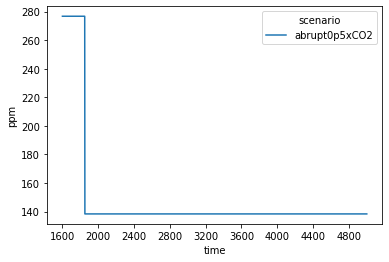

In [7]:
abtests = MAGICCData(join(CDR_DIR, co2_conc_filename), columns={"scenario": ['abrupt0p5xCO2']})
abtests.metadata = {"header": 
                    "abrupt-0p5xCO2 experiment file, CO2 concentrations halve in 1850 pymagicc, doi.org/10.21105/joss.00516, AGPL-3.0 License"}
abtests.line_plot()
abtests.timeseries()

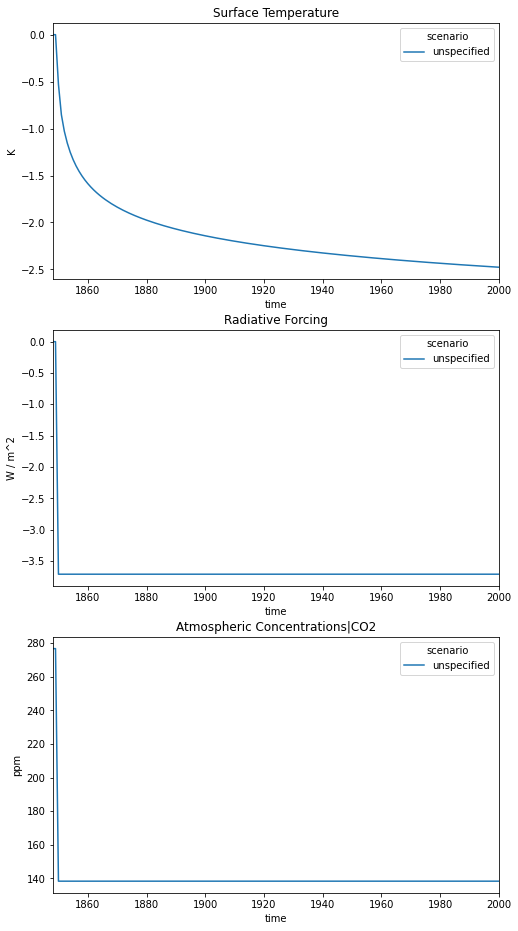

In [8]:
with MAGICC6() as magicc:
    tests = magicc.run(file_co2_conc = co2_conc_filename, **magcfg)
    res = meanbln(co2_conc_filename, tests, **magcfg)

fig, axes = plt.subplots((len(vars)), 1, figsize=(8, 16))
for n, var in enumerate(vars):
    res.filter(variable=var,region='World').lineplot(hue="scenario", ax=axes[n])
    ylab = res.filter(variable=var)["unit"].iloc[[0]].all()
    axes[n].set_ylabel(ylab)
    axes[n].set_title(var)                        
    axes[n].set_xlim(x)


In [9]:
res.filter(
    variable=["Surface Temperature", "Atmospheric Concentrations|CO2"], region="World"
).timeseries().loc[:, (datetime(1848, 1, 1, 0)) : (datetime(2000, 1, 1, 0))]

time                                                                                           1848-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2     276.744   
                                                          K    Surface Temperature                  0.000   

time                                                                                           1849-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2     276.744   
                                                          K    Surface Temperature                  0.000   

time                                                                                           1850-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -0.529524   

time                                                                                           1851-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -0.852952   

time                                                                                           1852-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -1.028233   

time                                                                                           1853-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -1.153667   

time                                                                                           1854-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -1.251453   

time                                                                                           1855-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -1.330951   

time                                                                                           1856-01-01  \
climate_model model       region scenario    todo         unit variable                                     
MAGICC6       unspecified World  unspecified not_relevant ppm  Atmospheric Concentrations|CO2  138.372000   
                                                          K    Surface Temperature              -1.397464   

time                                                               